# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

This data represents 17 campaigns that occurred between May 2008 and November 2010.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [100]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [101]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



# Explore the dataset

In [102]:
#check for missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [103]:
#Explore the features

df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

no     36548
yes     4640
Name: y, dtype: int64

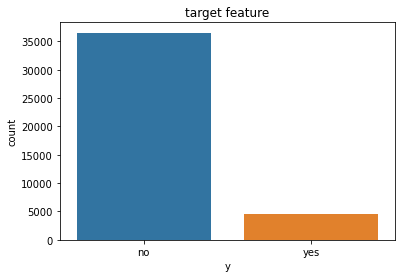

In [104]:
#The number clients that subscribed is our target feature
%matplotlib inline
sns.countplot(x=df['y'])
plt.title("target feature")

df['y'].value_counts()

As we can see, a lot more clients did not subscribe.

Let's try to find which features most heavily correlate with the target feature.

# Correlation Between Features

In [105]:
df['y'] = df['y'].map({"no":0,"yes":1})

Text(0.5, 1.0, 'Features Correlation Matrix')

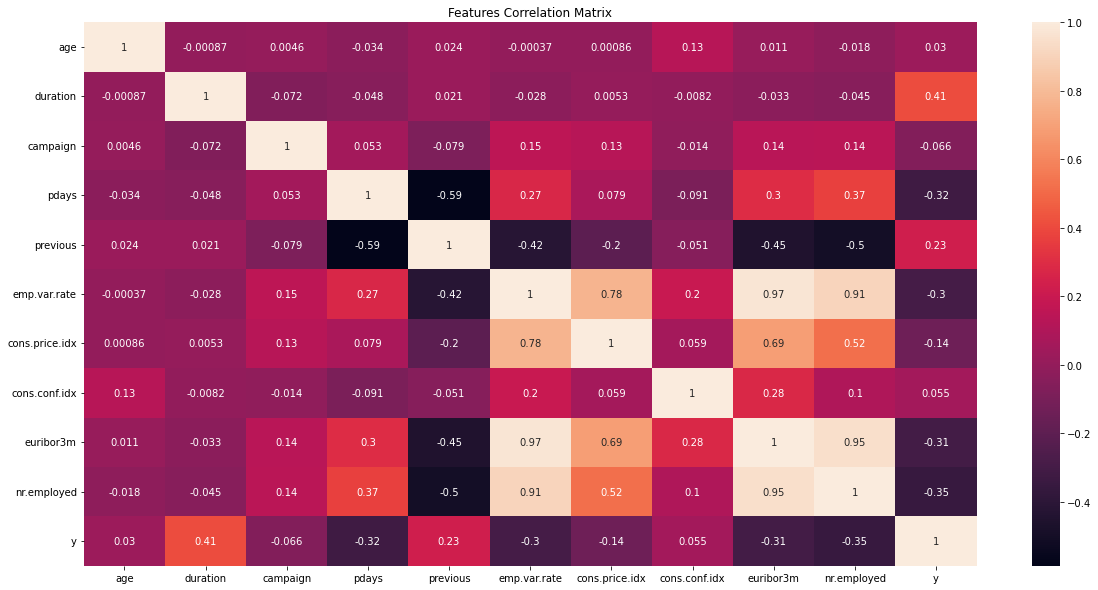

In [106]:
%matplotlib inline
#correlation matrix

corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)

plt.title("Features Correlation Matrix")

The duration of the call as well as the number of calls to a customer have a high correlation with the target feature, so let's explore these two features deeper.

# Correlation Between Number of Calls and Call Duration to Subscription Rate

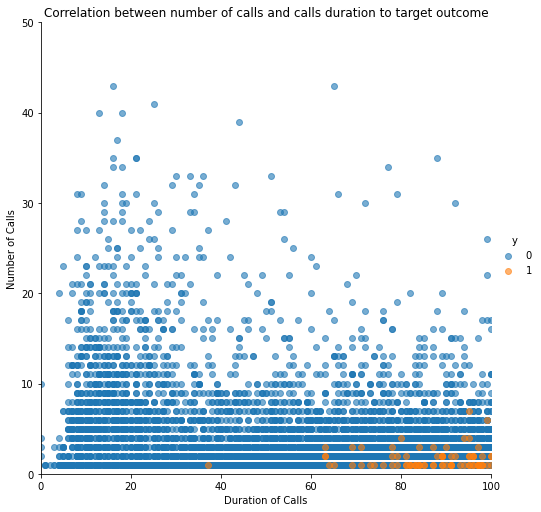

In [107]:
scatter = sns.lmplot(x='duration', y='campaign',data = df,
                     hue = 'y',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,100,0,50])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls')
plt.title('Correlation between number of calls and calls duration to target outcome')



plt.show()

As we can see, the longer the call, the more likely a customer is to subscribe. However, the more times a customer is called, the less likely they are to subscribe.

# Correlation Between Job and Education to Subscription Rate

As the job and education features are not numerical, they did not show up on the correlation matrix. However, it would be reasonable to assume that these features would have some connection with the target feature.

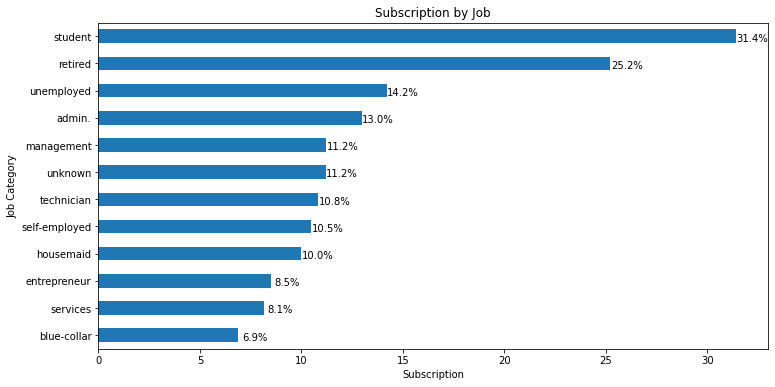

In [108]:
#Bar graph of subscriptions by job

job_sub = pd.crosstab(df['y'],df['job']).apply(lambda x: x/x.sum() * 100)
job_sub = job_sub.transpose()

plot_job = job_sub[1].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Subscription by Job')
plt.xlabel('Subscription')
plt.ylabel('Job Category')


for rec, label in zip(plot_job.patches,
                      job_sub[1].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

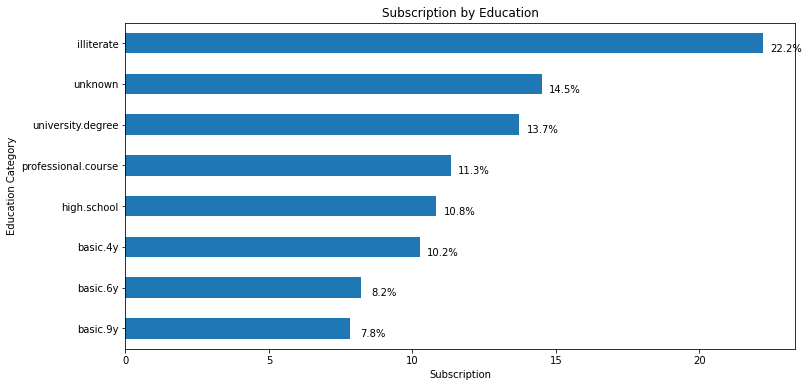

In [109]:
#Bar graph of subscriptions by education

edu_sub = pd.crosstab(df['y'],df['education']).apply(lambda x: x/x.sum() * 100)
edu_sub = edu_sub.transpose()

plot_job = edu_sub[1].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Subscription by Education')
plt.xlabel('Subscription')
plt.ylabel('Education Category')


for rec, label in zip(plot_job.patches,
                      edu_sub[1].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

From this we can see that in terms of jobs, students and retirees are more likely to subscribe. However, in terms of education, illiterate people are more likely to subscribe.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The objective is to understand the customers in order to improve the effectiveness of a bank's advertisement campaign via telephone by targeting customers who are more likely to subscribe or buy whatever product is being advertised. This can be done by analyzing customer features in relations to their responses towards previous telephone advertisements.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [111]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [112]:
encode_these = ['job',"marital","education","default","housing","loan","contact",
            "month","day_of_week","poutcome"]
le = preprocessing.LabelEncoder()

for i in encode_these:
    df[i] = le.fit_transform(df[i])

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [113]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [114]:
X = df.drop('y', axis=1)
y =df['y']

In [115]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=112)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((30891, 20), (30891,), (10297, 20), (10297,))

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [116]:
from sklearn.dummy import DummyClassifier

In [117]:
dum_clf = DummyClassifier(strategy="stratified")

In [118]:
dum_clf.fit(X_train, y_train)
preds = dum_clf.predict(X_test)
accuracy_score(y_test, preds)

0.7936292123919588

The baseline performance that our classifer should aim to beat is an accuracy of 79.52%

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [119]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test,y_test)

0.908128581140138

### Problem 9: Score the Model

What is the accuracy of your model?

My basic model using logistic regression scored an accuracy of 90.81%

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time

In [121]:
dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    
    "Decision Tree": DecisionTreeClassifier()
    
    
}

In [122]:
no_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, Y_train,X_test,Y_test,verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.process_time()
        classifier.fit(X_train, Y_train)
        t_end = time.process_time()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        test_score = classifier.score(X_test, Y_test)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'test_score'] = test_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

In [123]:
df_results = batch_classify(X_train, y_train, X_test, y_test)
print(df_results.sort_values(by='train_score', ascending=False))

trained Logistic Regression in 1.17 s
trained Nearest Neighbors in 0.03 s
trained Linear SVM in 18.31 s
trained Decision Tree in 0.22 s
            classifier  train_score  training_time  test_score
3        Decision Tree     1.000000       0.218750    0.892007
1    Nearest Neighbors     0.931598       0.031250    0.904050
0  Logistic Regression     0.908549       1.171875    0.908129
2           Linear SVM     0.898482      18.312500    0.896183


Nearest neighbors has the shortest training time and second to highest test score. Logistic regression has a slightly better test score but a much longer training time than nearest neighbor. Linear SVM is by far the worst with the longest training time and lowest test score.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### Possible Included Features for Future Data

If it can be shown that some genders are more likely to subscribe than others, then yes, the gender feature should be kept in order to identify which gender we want to target with our campaign. Other possible features to include in the future are location, ethnicity/race, income, is primary financial provider, etc.

# Conclusion

In this notebook, I have compared four classifiers: Decision tree, nearest neighbors, logistic regression, and linear SVM. Of these four classifiers, the nearest neighbors classifier has a training time of 0.03 seconds and a test score of 0.904. Logistic regression, meanwhile, has a higher test score of 0.908 which is higher than nearest neighbors. However, it also has a training time of 1.17 seconds, about 39 times slower than nearest neighbors.

In conclusion, nearest neighbors is the best classifier among these four.